
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [2]:
import numpy as np
import pandas as pd

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [3]:
my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data'
                      ,delimiter=','
                      ,header=0
                      ,names=my_cols)

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

In [5]:
df = pd.DataFrame(data=my_data)
df

,Number of O-rings at risk on a given flight,Number experiencing thermal distress,Launch temperature (degrees F),Leak-check pressure (psi),Temporal order of flight
0,6,1,70,50,2
1,6,0,69,50,3
2,6,0,68,50,4
3,6,0,67,50,5
4,6,0,72,50,6
5,6,0,73,100,7
6,6,0,70,100,8
7,6,1,57,200,9
8,6,1,63,200,10
9,6,1,70,200,11


In [6]:
# Completar valores nulos - en este caso el paso no es necesario dado la ausencia de valores NaN
imputer_ = SimpleImputer(missing_values=np.nan, strategy='mean')
my_imputed_data = imputer_.fit_transform(my_data)
my_imputed_data

array([[  6.,   1.,  70.,  50.,   2.],
       [  6.,   0.,  69.,  50.,   3.],
       [  6.,   0.,  68.,  50.,   4.],
       [  6.,   0.,  67.,  50.,   5.],
       [  6.,   0.,  72.,  50.,   6.],
       [  6.,   0.,  73., 100.,   7.],
       [  6.,   0.,  70., 100.,   8.],
       [  6.,   1.,  57., 200.,   9.],
       [  6.,   1.,  63., 200.,  10.],
       [  6.,   1.,  70., 200.,  11.],
       [  6.,   0.,  78., 200.,  12.],
       [  6.,   0.,  67., 200.,  13.],
       [  6.,   2.,  53., 200.,  14.],
       [  6.,   0.,  67., 200.,  15.],
       [  6.,   0.,  75., 200.,  16.],
       [  6.,   0.,  70., 200.,  17.],
       [  6.,   0.,  81., 200.,  18.],
       [  6.,   0.,  76., 200.,  19.],
       [  6.,   0.,  79., 200.,  20.],
       [  6.,   2.,  75., 200.,  21.],
       [  6.,   0.,  76., 200.,  22.],
       [  6.,   1.,  58., 200.,  23.]])

In [7]:
# Escalar datos
scaler = StandardScaler()
my_data_scaled = scaler.fit_transform(my_imputed_data)
my_data_scaled

array([[ 0.        ,  0.90795938,  0.03888242, -1.65653234, -1.65503185],
       [ 0.        , -0.62858727, -0.10368646, -1.65653234, -1.49740977],
       [ 0.        , -0.62858727, -0.24625534, -1.65653234, -1.33978769],
       [ 0.        , -0.62858727, -0.38882422, -1.65653234, -1.18216561],
       [ 0.        , -0.62858727,  0.32402019, -1.65653234, -1.02454353],
       [ 0.        , -0.62858727,  0.46658907, -0.88113422, -0.86692145],
       [ 0.        , -0.62858727,  0.03888242, -0.88113422, -0.70929937],
       [ 0.        ,  0.90795938, -1.81451304,  0.66966201, -0.55167728],
       [ 0.        ,  0.90795938, -0.95909975,  0.66966201, -0.3940552 ],
       [ 0.        ,  0.90795938,  0.03888242,  0.66966201, -0.23643312],
       [ 0.        , -0.62858727,  1.17943348,  0.66966201, -0.07881104],
       [ 0.        , -0.62858727, -0.38882422,  0.66966201,  0.07881104],
       [ 0.        ,  2.44450604, -2.38478857,  0.66966201,  0.23643312],
       [ 0.        , -0.62858727, -0.3

In [8]:
# optimizar tabla a mano - Eliminación de columna de cantidad de orings (y de N° de vuelo opcional)
#my_data2=my_data.drop(['Number of O-rings at risk on a given flight','Temporal order of flight'], axis=1)
my_data2=my_data.drop(['Number of O-rings at risk on a given flight'], axis=1)
# Completado de NaNs
imputer_2 = SimpleImputer(missing_values=np.nan, strategy='mean')
my_imputed_data2 = imputer_.fit_transform(my_data2)
my_imputed_data2
# Escalado de los datos
scaler2 = StandardScaler()
my_data_scaled2 = scaler2.fit_transform(my_imputed_data2)
# Recuperación del dato de los orings dañados
my_data_scaled2[:,0]=my_imputed_data2[:,0]
my_data_scaled2


array([[ 1.        ,  0.03888242, -1.65653234, -1.65503185],
       [ 0.        , -0.10368646, -1.65653234, -1.49740977],
       [ 0.        , -0.24625534, -1.65653234, -1.33978769],
       [ 0.        , -0.38882422, -1.65653234, -1.18216561],
       [ 0.        ,  0.32402019, -1.65653234, -1.02454353],
       [ 0.        ,  0.46658907, -0.88113422, -0.86692145],
       [ 0.        ,  0.03888242, -0.88113422, -0.70929937],
       [ 1.        , -1.81451304,  0.66966201, -0.55167728],
       [ 1.        , -0.95909975,  0.66966201, -0.3940552 ],
       [ 1.        ,  0.03888242,  0.66966201, -0.23643312],
       [ 0.        ,  1.17943348,  0.66966201, -0.07881104],
       [ 0.        , -0.38882422,  0.66966201,  0.07881104],
       [ 2.        , -2.38478857,  0.66966201,  0.23643312],
       [ 0.        , -0.38882422,  0.66966201,  0.3940552 ],
       [ 0.        ,  0.75172683,  0.66966201,  0.55167728],
       [ 0.        ,  0.03888242,  0.66966201,  0.70929937],
       [ 0.        ,  1.

In [9]:
# Reducción de dimensionalidad por PCA - no utilizado en la siguiente etapa
pca = PCA(n_components=0.9).fit(my_data_scaled)
X_pca = pca.transform(my_data_scaled)
print("Cantidad de componentes necesarios para explicar el 90% de la varianza:", X_pca.shape[1])
X_pca

Cantidad de componentes necesarios para explicar el 90% de la varianza: 3


array([[ 1.93919146,  1.09201914,  1.16198701],
       [ 2.31211733,  0.18878977, -0.02975072],
       [ 2.20390772,  0.25381937, -0.13037678],
       [ 2.09569811,  0.31884897, -0.23100284],
       [ 2.01419639, -0.24138634,  0.22950299],
       [ 1.38463199, -0.44885195,  0.1206637 ],
       [ 1.26751974, -0.17540071, -0.16700633],
       [-0.435756  ,  1.98027054, -0.6892989 ],
       [-0.5128064 ,  1.31582441, -0.13527109],
       [-0.58540548,  0.54716746,  0.51227871],
       [-0.17241777, -1.29395928,  0.16223882],
       [-0.32514054, -0.18682149, -0.87360707],
       [-1.45348824,  3.16946669, -0.00779557],
       [-0.53265714, -0.26518393, -0.88781523],
       [-0.6008049 , -1.1380517 , -0.14674345],
       [-0.72681978, -0.65617883, -0.62145744],
       [-0.7816136 , -1.84167905,  0.40018028],
       [-0.90762848, -1.35980618, -0.07453371],
       [-0.99803283, -1.71161985,  0.19892816],
       [-2.08186736,  0.60256015,  1.99995948],
       [-1.21890337, -1.47734983, -0.095

C:\Users\Facu\AppData\Local\Temp\ipykernel_9340\1413522311.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 3))


Text(0.5, 1.0, 'PCA projection 2D')

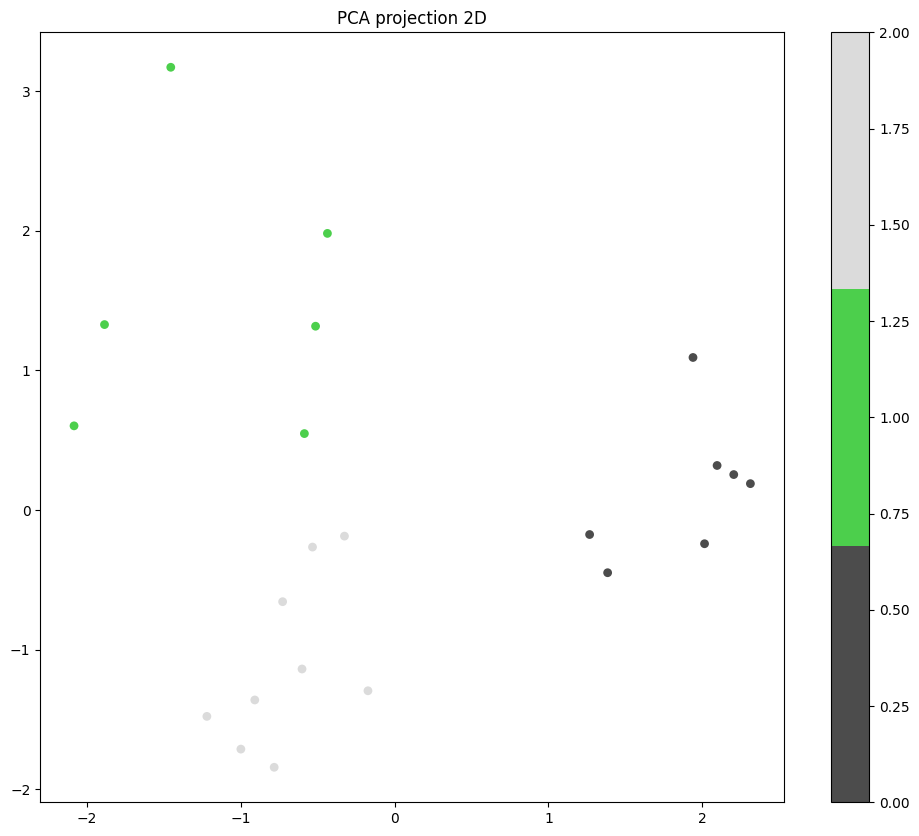

In [29]:
# PCA - no utilizado en la siguiente etapa
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

kmeans = KMeans(n_clusters=3, n_init=50)
kmeans.fit(X_pca)
cluster_labels_ = kmeans.labels_

plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 3))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('PCA projection 2D')

In [9]:
# Separación de variables y targets
y = my_data_scaled2[:,0]
X = my_data_scaled2[:,1:]
X

# No separo en train, validation y test dado la cantidad reducida de valores,
# principalmente ya que solo existen dos casos con 2 orings dañados
# Contrastaré todos los targets con la devolución de los modelos

array([[ 0.03888242, -1.65653234, -1.65503185],
       [-0.10368646, -1.65653234, -1.49740977],
       [-0.24625534, -1.65653234, -1.33978769],
       [-0.38882422, -1.65653234, -1.18216561],
       [ 0.32402019, -1.65653234, -1.02454353],
       [ 0.46658907, -0.88113422, -0.86692145],
       [ 0.03888242, -0.88113422, -0.70929937],
       [-1.81451304,  0.66966201, -0.55167728],
       [-0.95909975,  0.66966201, -0.3940552 ],
       [ 0.03888242,  0.66966201, -0.23643312],
       [ 1.17943348,  0.66966201, -0.07881104],
       [-0.38882422,  0.66966201,  0.07881104],
       [-2.38478857,  0.66966201,  0.23643312],
       [-0.38882422,  0.66966201,  0.3940552 ],
       [ 0.75172683,  0.66966201,  0.55167728],
       [ 0.03888242,  0.66966201,  0.70929937],
       [ 1.60714012,  0.66966201,  0.86692145],
       [ 0.89429571,  0.66966201,  1.02454353],
       [ 1.32200236,  0.66966201,  1.18216561],
       [ 0.75172683,  0.66966201,  1.33978769],
       [ 0.89429571,  0.66966201,  1.497

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [10]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor

In [11]:
from matplotlib import pyplot as plt


In [30]:
# Aproximación con OneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

clasificador = OneVsRestClassifier(SVC())
clasificador.fit(X, y)

y_hat = np.zeros(y.shape)
for i in range(0,y_hat.shape[0],1):
    y_hat[i] = clasificador.predict([X[i,:]])
print(y_hat,'\n',y)

# Cálculo de ERR
ERR = 0
for i in range(0,y_hat.shape[0],1):
    if(y_hat[i]!=y[i]):
        ERR=ERR+1
ERR = ERR/y_hat.shape[0]
print('ERR = ',ERR)

[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 0. 1.]
ERR =  0.18181818181818182


In [37]:
# Aproximación con SGDClassifier
from sklearn.inspection import DecisionBoundaryDisplay

clasificador = SGDClassifier(alpha=0.001, max_iter=100)
clasificador.fit(X, y)

y_hat = np.zeros(y.shape)
for i in range(0,y_hat.shape[0],1):
    y_hat[i] = clasificador.predict([X[i,:]])
print(y_hat,'\n',y)

# Cálculo de ERR
ERR = 0
for i in range(0,y_hat.shape[0],1):
    if(y_hat[i]!=y[i]):
        ERR=ERR+1
ERR = ERR/y_hat.shape[0]
print('ERR = ',ERR)

[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 2.] 
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 0. 1.]
ERR =  0.18181818181818182


In [34]:
# Aproximación con SGDRegressor
from sklearn.inspection import DecisionBoundaryDisplay

clasificador = SGDRegressor(alpha=0.0001, max_iter=1000)
clasificador.fit(X, y)

y_hat = np.zeros(y.shape)
for i in range(0,y_hat.shape[0],1):
    y_hat[i] = int(clasificador.predict([X[i,:]]) + 0.5)
print(y_hat,'\n',y)

# Cálculo de ERR
ERR = 0
for i in range(0,y_hat.shape[0],1):
    if(y_hat[i]!=y[i]):
        ERR=ERR+1
ERR = ERR/y_hat.shape[0]
print('ERR = ',ERR)

[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.] 
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 0. 1.]
ERR =  0.2727272727272727


## Conclusiones

Se utilizó la métrica ERR para comparar los resultados de la estimación.</br>
Dado pruebas realizadas, ejecutando los bloques de código en diversas ocasiones, se apreció que el método de OneVsRestClassifier tiende a presentar un ERR levemente mejor que los métodos de gradiente descendente estocásticos.</br>

Los datos de la columna 'Temporal order of flight' no son relevantes en la estimación de orings dañados. Esto se concluyo a raíz de realizar las pruebas incluyendo y no esta columna y no se apreciaron cambios en los resultados.</br>
De esto se concluye que no parece haber una mejora ni degradación de la calidad de los elementos conforme se realizan nuevos lanzamientos. Por lo que a priori no se visualizan mejoras en la técnica o tecnología de los oring que esté relacionada directamente con la cantidad de lanzamientos realizados.

Los casos de falla de 2 orings son difíciles de predecir, principalmente porque en el dataset solo existen dos casos de los mismos. Pero se aprecia que los métodos de gradiente descendente estocásticos tienden a tener mayor facilidad para la detección de los casos de 2 orings que el estimador OneVsRestClassifier.

Considero que el dataset es reducido, y que un dataset con mayor registros de lanzamientos puede llevar a un mejor modelado de los clasificadores. Esto no siempre es posible ya que el evento del lanzamiento de un cohete no es lo suficientemente habitual como para generar extensas bases de datos. Pero los clasificadores pueden mejorar conforme se realizan futuros lanzamientos.